In [141]:
import random
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

# Naive Bayes

## Part A


In [142]:
p=[0.125,0.5,0.25,0.125]

sum_list=[]

for i in range(0,1000):
    x=random.choices([1,2,3,4],weights=p,k=4)
    sum_list.append(sum(x))



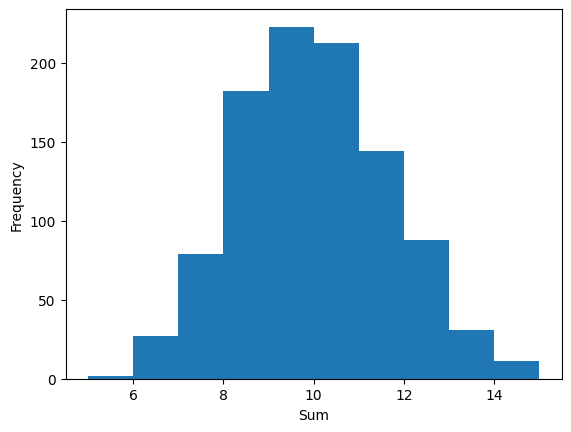

In [143]:
# plotting the frequency distribution histogram 
plt.hist(sum_list,label="Sum of 4 random variables")
plt.xlabel("Sum")
plt.ylabel("Frequency")
plt.show()

In [144]:
# printing the 5 number summary
print("5 number summary of the sum of 4 random variables:")
print("Minimum:",min(sum_list))
print("Maximum:",max(sum_list))
print("Median:",np.median(sum_list))
print("1st Quartile:",np.percentile(sum_list,25))
print("3rd Quartile:",np.percentile(sum_list,75))


5 number summary of the sum of 4 random variables:
Minimum: 5
Maximum: 15
Median: 9.0
1st Quartile: 8.0
3rd Quartile: 11.0


Expected Value of dice roll , 
E[X<sub>i</sub>] = 1*$\frac{1}{8}$ + 2*$\frac{1}{2}$ + 3*$\frac{1}{4}$ + 4*$\frac{1}{8}$ = 2.375

The theoretical Expected Sum ,
E[X] = E[X<sub>1</sub> + X<sub>2</sub> + X<sub>3</sub> + X<sub>4</sub>]
= E[X<sub>1</sub>] + E[X<sub>2</sub>] + E[X<sub>3</sub>] + E[X<sub>4</sub>]
= 4*E[X<sub>1</sub>] 
= 9.5

In [145]:
Mean = np.mean(sum_list)
print("Mean/Expected sum from the python simulation :",Mean)

Mean/Expected sum from the python simulation : 9.517


So Theoretical Expected sum is close to the Expected sum from the simulation

Next we try for k = 4 and randomly roll the die 8 times and calculate the sum of the upward face value.

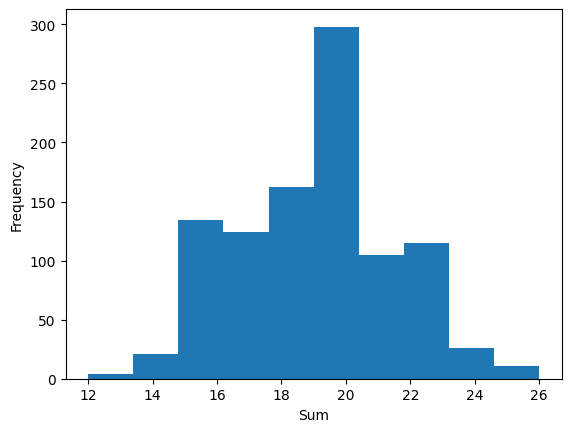

5 number summary of the sum of 4 random variables:
Minimum: 12
Maximum: 26
Median: 19.0
1st Quartile: 17.0
3rd Quartile: 21.0


In [146]:
p=[0.125,0.5,0.25,0.125]

sum_list=[]

for i in range(0,1000):
    x=random.choices([1,2,3,4],weights=p,k=8)
    sum_list.append(sum(x))

# plotting the histogram between 4 and 16
plt.hist(sum_list,label="Sum of 4 random variables")
plt.xlabel("Sum")
plt.ylabel("Frequency")
plt.show()

# printing the 5 number summary
print("5 number summary of the sum of 4 random variables:")
print("Minimum:",min(sum_list))
print("Maximum:",max(sum_list))
print("Median:",np.median(sum_list))
print("1st Quartile:",np.percentile(sum_list,25))
print("3rd Quartile:",np.percentile(sum_list,75))


Expected Value of dice roll , 
E[X<sub>i</sub>] = 1*$\frac{1}{8}$ + 2*$\frac{1}{2}$ + 3*$\frac{1}{4}$ + 4*$\frac{1}{8}$ = 2.375

The theoretical Expected Sum ,
E[X] = E[X<sub>1</sub> + X<sub>2</sub> + X<sub>3</sub> + X<sub>4</sub>] + E[X<sub>5</sub> + X<sub>6</sub> + X<sub>7</sub> + X<sub>8</sub>]
= E[X<sub>1</sub>] + E[X<sub>2</sub>] + E[X<sub>3</sub>] + E[X<sub>4</sub>] + E[X<sub>5</sub>] + E[X<sub>6</sub>] + E[X<sub>7</sub>] + E[X<sub>8</sub>]
= 9*E[X<sub>1</sub>] 
= 19

In [147]:
Mean = np.mean(sum_list)
print("Mean/Expected sum from the python simulation :",Mean)

Mean/Expected sum from the python simulation : 18.974


So Theoretical Expected sum is close to the Expected sum from the simulation

Next we do the same for k=16

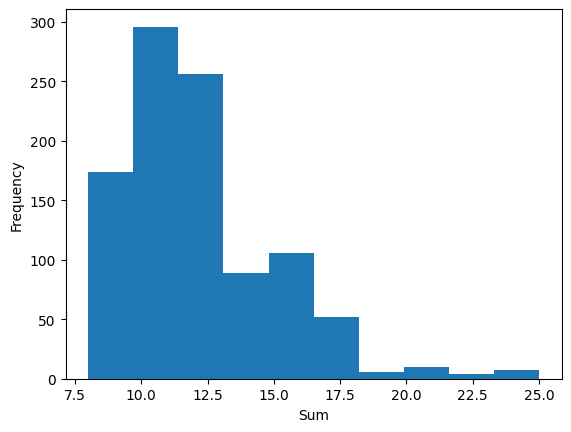

5 number summary of the sum of 4 random variables:
Minimum: 8
Maximum: 25
Median: 12.0
1st Quartile: 10.0
3rd Quartile: 14.0


In [148]:
p=[1/(2**(i-1)) for i in range(2,17)]

p.insert(0,1/(2**15))

sum_list=[]

for i in range(0,1000):
    x=random.choices([i for i in range(1,17)],weights=p,k=4)
    sum_list.append(sum(x))

# plotting the histogram between 4 and 16
plt.hist(sum_list,label="Sum of 4 random variables")
plt.xlabel("Sum")
plt.ylabel("Frequency")
plt.show()

# printing the 5 number summary
print("5 number summary of the sum of 4 random variables:")
print("Minimum:",min(sum_list))
print("Maximum:",max(sum_list))
print("Median:",np.median(sum_list))
print("1st Quartile:",np.percentile(sum_list,25))
print("3rd Quartile:",np.percentile(sum_list,75))

In [149]:
print("Mean/Expected sum from the python simulation :",np.mean(sum_list))
print("Theoretical expected sum:",np.round(np.sum([i*p[i-1] for i in range(1,17)])*4,5))

Mean/Expected sum from the python simulation : 12.177
Theoretical expected sum: 11.99792


### Part B : Implementation of Naive Bayes

In [150]:
import pandas as pd 
from ucimlrepo import fetch_ucirepo


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [151]:
# 1.fetch dataset
spambase = fetch_ucirepo(id=94)


# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets



In [152]:
# 2.Splitting the dataset to train and test and validation sets
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=104,train_size=0.8,shuffle=True)
X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,random_state=104,train_size=0.5,shuffle=True)

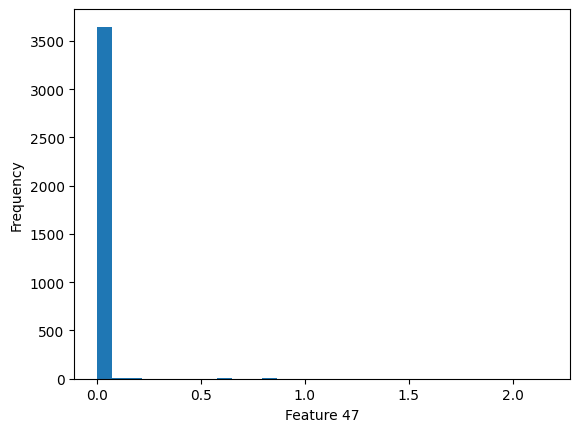

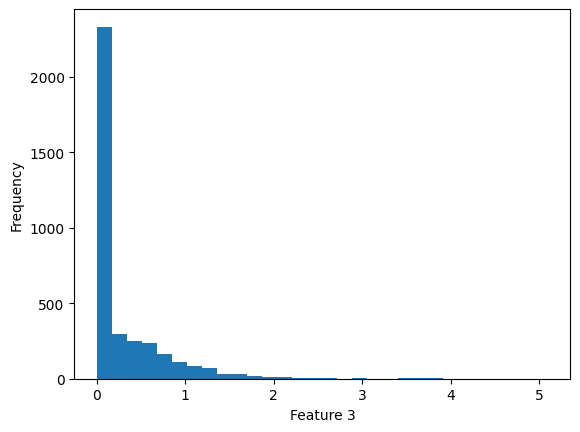

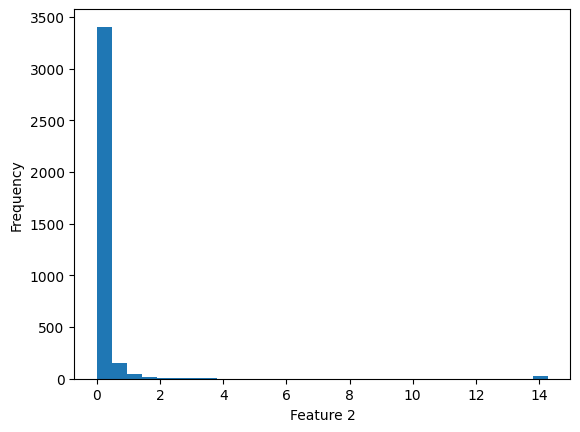

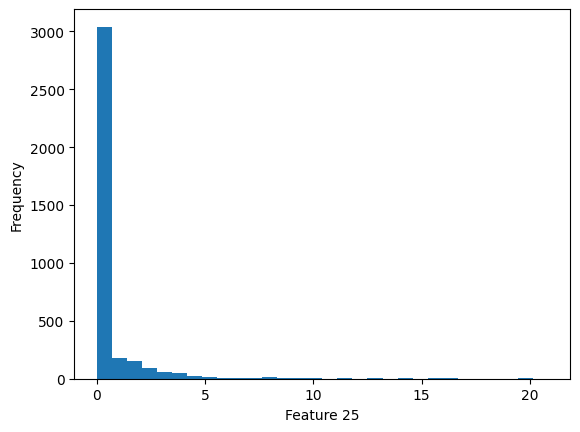

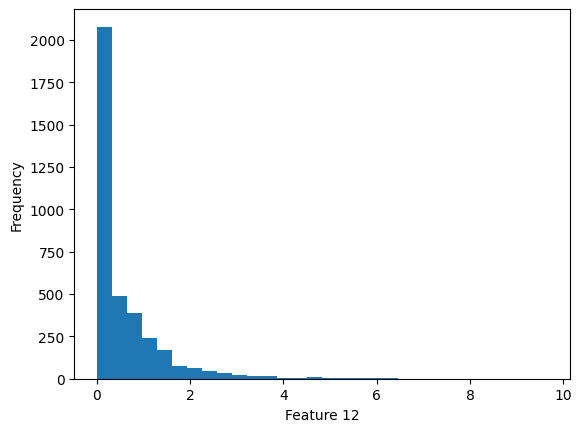

In [153]:
# 3. Plot distribution
# Choosing some 5 columns from the dataset and plot the probability distribution.

def plot(X_train) :
    for i in random.sample(range(0,57),5):
        plt.hist(X_train.iloc[:,i],bins=30,)
        plt.xlabel("Feature "+str(i+1))
        plt.ylabel("Frequency")
        plt.show()

plot(X_train)

In [154]:
# 4.Calculating priors 
p_1 = np.sum(y_train,axis=0)/len(y_train)
p_0 = 1-p_1
print("Prior of class 1:",p_1)
print("Prior of class 0:",p_0)

Prior of class 1: Class    0.390489
dtype: float64
Prior of class 0: Class    0.609511
dtype: float64


In [155]:
# 5. Naive bayes model 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
class Naive_bayes :
    
    def __init__(self) :
        self.no_of_features = 0
        self.mean_list_1 = []
        self.mean_list_0 = []
        self.var_list_1 = []
        self.var_list_0 = []
        self.p_1 = 0
        self.p_0 = 0
        self.y_pred = []
        self.no_of_parameters = 0
        
    def fit(self,X_train,y_train) :
        self.no_of_features = X_train.shape[1]
        sum1 = np.sum(y_train,axis=0)
        self.p_1 = sum1/y_train.shape[0]
        self.p_0 = 1-self.p_1
        for i in range(self.no_of_features) :
            self.mean_list_1.append(np.mean(X_train.loc[(y_train['Class']==1),X_train.columns[i]]))
            self.mean_list_0.append(np.mean(X_train.loc[(y_train['Class']==0),X_train.columns[i]]))
            self.var_list_1.append(np.var(X_train.loc[(y_train['Class']==1),X_train.columns[i]]))
            self.var_list_0.append(np.var(X_train.loc[(y_train['Class']==0),X_train.columns[i]]))
            
        
        self.mean_list_1 = np.array(self.mean_list_1)
        self.mean_list_0 = np.array(self.mean_list_0)  
        self.var_list_1 = np.array(self.var_list_1)
        self.var_list_0 = np.array(self.var_list_0)
        
        self.no_of_parameters = 2*self.no_of_features + 2
        
    def predict(self,X_test) :
        for i in range(X_test.shape[0]) :
            p1 = np.prod((1/np.sqrt(2*np.pi*self.var_list_1))*np.exp(-((X_test.iloc[i,:]-self.mean_list_1)**2)/(2*self.var_list_1)))
            p0 = np.prod((1/np.sqrt(2*np.pi*self.var_list_0))*np.exp(-((X_test.iloc[i,:]-self.mean_list_0)**2)/(2*self.var_list_0)))
            
            if (p1*self.p_1 > p0*self.p_0).all():
                self.y_pred.append(1)
            else :
                self.y_pred.append(0)
        # return np array
        return self.y_pred
    
    
    def accuracy(self,y_test) :
        return accuracy_score(y_test,self.y_pred)
    
    def precision(self,y_test) :
        return precision_score(y_test,self.y_pred)
    
    def recall(self,y_test) :
        return recall_score(y_test,self.y_pred)
    
    def f1_score(self,y_test) : 
        return f1_score(y_test,self.y_pred)        
            

In [156]:
# naive bayes model without log transformation

nb= Naive_bayes()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

print("For the naive bayes model without log transformation:")

print("Accuracy:",nb.accuracy(y_test))
print("Precision:",nb.precision(y_test))
print("Recall:",nb.recall(y_test))
print("F1 score:",nb.f1_score(y_test))


For the naive bayes model without log transformation:
Accuracy: 0.8373101952277657
Precision: 0.7611336032388664
Recall: 0.9215686274509803
F1 score: 0.8337028824833702


In [157]:
# naive bayes model with log transformation
X_train_log = np.log(X_train+0.1)
X_test_log = np.log(X_test+0.1)

nb_log= Naive_bayes()
nb_log.fit(X_train_log,y_train)
y_pred = nb_log.predict(X_test_log)

print("For the naive bayes model with log transformation:")
print("Accuracy:",nb_log.accuracy(y_test))
print("Precision:",nb_log.precision(y_test))
print("Recall:",nb_log.recall(y_test))
print("F1 score:",nb_log.f1_score(y_test))


For the naive bayes model with log transformation:
Accuracy: 0.8438177874186551
Precision: 0.7773109243697479
Recall: 0.9068627450980392
F1 score: 0.8371040723981901


#### 8. Discussion

The changes that we notice in the scores from the two datasets (with and without log transformation) are very similar .
However we notice a slight increase in the accuracy after applying the log tranformation . On the other hand , there is a slight dip in recall value . 

So though the difference is small , we can say that model with log transformation would genralise better , however the higher recall of the model without log transformation would imply that there is smaller chance that this model will classify a non-spam mail as spam when compared to model with log transformation 

....

## Part C : sklearn implementation of Naive Bayes 


In [158]:
# 1. Training the model with and without log transformation
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
nb = GaussianNB()
nb.fit(X_train,y_train.values.ravel())
y_pred = nb.predict(X_test)


# accuracy
print("Accuracy of the model:",accuracy_score(y_test,y_pred))


Accuracy of the model: 0.8394793926247288


In [159]:
# applying log transformation on the data
X_train_log = np.log(X_train+0.1)
X_test_log = np.log(X_test+0.1)

nb_log = GaussianNB()
nb_log.fit(X_train_log,y_train.values.ravel())
y_pred = nb_log.predict(X_test_log)

# accuracy
print("Accuracy of the model after log transformation:",accuracy_score(y_test,y_pred))

# tabulate teh accuracy , precision , recall and f1 score using tabulate 
t = tabulate([["Accuracy",accuracy_score(y_test,y_pred)],["Precision",precision_score(y_test,y_pred)],["Recall",recall_score(y_test,y_pred)],["F1 score",f1_score(y_test,y_pred)]],headers=["Metric","With log transformation"])


Accuracy of the model after log transformation: 0.8438177874186551


AUC for the model without log transformation: 0.941
AUC for the model with log transformation: 0.948


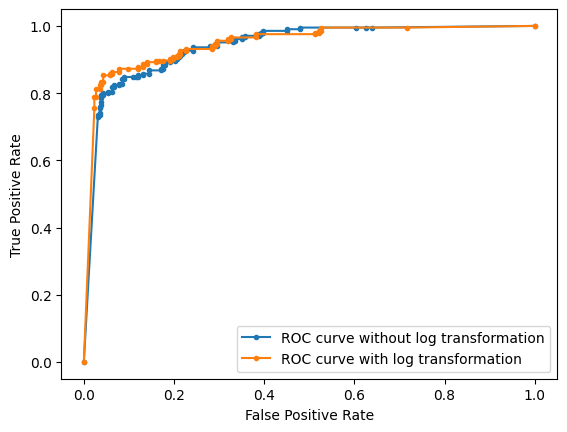

In [160]:

# plot ROC curve for both the models
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
probs1 = nb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
# calculate AUC
auc1 = roc_auc_score(y_test, probs1)
print('AUC for the model without log transformation: %.3f' % auc1)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs1)
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.',label="ROC curve without log transformation")
# show the plot
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.legend()

# predict probabilities
probs = nb_log.predict_proba(X_test_log)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC for the model with log transformation: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.',label="ROC curve with log transformation")
# show the plot
pyplot.legend()
pyplot.show()



We look at the two curves and prefer the one with log tranformation because it has the higher auc score 


In [161]:
from sklearn.svm import SVC

# normalise X
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 2.Splitting the dataset to train and test and validation sets
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=104,train_size=0.8,shuffle=True)
X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,random_state=104,train_size=0.5,shuffle=True)

# train the model
svm = SVC(kernel="linear")
svm.fit(X_train,y_train.values.ravel())

# predict
y_pred = svm.predict(X_test)

In [162]:
# tabulate the accuracy , precision , recall and f1 score using tabulate
print("The SVM model : ")
print(tabulate([["Accuracy",accuracy_score(y_test,y_pred)],["Precision",precision_score(y_test,y_pred)],["Recall",recall_score(y_test,y_pred)],["F1 score",f1_score(y_test,y_pred)]],headers=["Metrics","Value"]))


# tabulate the accuracy , precision , recall and f1 for naive bayes model with log transformation using tabulate
print("\n\nThe Naive Bayes model with log transformation : ")
print(t)

The SVM model : 
Metrics       Value
---------  --------
Accuracy   0.91974
Precision  0.946524
Recall     0.867647
F1 score   0.905371


The Naive Bayes model with log transformation : 
Metric       With log transformation
---------  -------------------------
Accuracy                    0.843818
Precision                   0.777311
Recall                      0.906863
F1 score                    0.837104


We notice that the SVM model is able to better fit the data , and is more likely to correctly classify a mail as spam or not spam . The higher accuracy of the SVM model over the Naive Bayes helps us to deduce this .
However we must also look at the recall values of the two models as well , the naive bayes has a better recall than the SVM model . Infact this seems like a more important measure than accuracy , as we wouldnt want non spam emails to be classified as spam , even though some spam emails be classifed as non-spam . So under those parameters , the naive bayes seems to do a better job over the SVM model.